# OpenFEMA Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path


In [14]:
cwd = Path('/Users/bensalis/Downloads/OpenFEMA Datasets')
df = pd.read_csv(cwd/'PublicAssistanceFundedProjectsDetails.csv')
decs = pd.read_csv(cwd/'DisasterDeclarationsSummaries.csv')

/var/folders/09/0002cv5n42g4tfbh0sk10y480000gn/T/ipykernel_20951/1574217332.py:3: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  decs = pd.read_csv(cwd/'DisasterDeclarationsSummaries.csv')


In [122]:
plt.style.use('Solarize_Light2')
plt.rc(
    "figure",
    autolayout=True,
    figsize=(20, 10),
    titlesize=25,
    titleweight='bold'
)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="larger",
    titleweight="bold",
    titlesize=20,
    titlepad=15
)
plt.rcParams['axes.grid.which'] = 'both'
plt.rcParams['font.family'] = 'serif'
%config InlineBackend.figure_format = 'retina'

## Preparing for Inflation Adjustments

In [47]:
rates = [1.6, 2.7, 3.4, 1.6, 2.4, 1.9, 3.3, 3.4, 2.5,4.1, 0.1, 2.7, 1.5, 3.0, 1.7, 1.5, 0.8, 0.7, 2.1, 2.1, 1.9, 2.3, 1.4, 7, 6.5, 3.4, 2.9, 2.7]
# pct rates retrieved from Bureau of Labor Statistics (CPI)

years = np.arange(1998, 2026, step =1)
annual = pd.DataFrame({'year':years, 'inflation_rate':rates})
annual['factor'] = (annual.inflation_rate / 100) + 1
annual.set_index('year', inplace= True)

annual

,inflation_rate,factor
year,,
1998,1.6,1.016
1999,2.7,1.027
2000,3.4,1.034
2001,1.6,1.016
2002,2.4,1.024
2003,1.9,1.019
2004,3.3,1.033
2005,3.4,1.034
2006,2.5,1.025


In [48]:
for index, row in annual.iterrows():
    if index == 2025:
        annual.at[index, 'currentDollar'] = 1
    else:
        annual.at[index, 'currentDollar'] = np.product(annual.loc[index + 1:, 'factor'])
        
annual['currentDollar'] = np.round(annual['currentDollar'], 2)

In [49]:
annual

,inflation_rate,factor,currentDollar
year,,,
1998,1.6,1.016,1.98
1999,2.7,1.027,1.93
2000,3.4,1.034,1.87
2001,1.6,1.016,1.84
2002,2.4,1.024,1.79
2003,1.9,1.019,1.76
2004,3.3,1.033,1.70
2005,3.4,1.034,1.65
2006,2.5,1.025,1.61


## Introducing PA Project Summary Data (OpenFEMA)

In [10]:
df.head(3)

,disasterNumber,declarationDate,incidentType,state,county,applicantName,educationApplicant,numberOfProjects,federalObligatedAmount,lastRefresh,hash,id
0,4117,2013-05-20T00:00:00.000Z,Tornado,Oklahoma,Canadian County,PIEDMONT,0,3,18789.74,2025-11-27T15:02:55.300Z,6735e166e19e26665c02c011f0165726d99ec03b,962b7870-12a3-4cd6-8427-23fcd3a47342
1,4480,2020-03-20T00:00:00.000Z,Biological,New York,Ontario County,"Victor Farmington Volunteer Ambulance Corps, Inc.",0,5,38048.44,2025-11-06T15:02:02.841Z,09b5497832dd9a36519c3823459ee028b08afa58,cf13abf5-8af5-41d1-8101-466711ac6fad
2,4332,2017-08-25T00:00:00.000Z,Hurricane,Texas,Galveston County,"League City, City of",0,22,7057457.58,2025-11-06T15:02:02.841Z,3bcc0807ba398d96b04875ce6b0df108643adbd1,0936a854-a00e-486d-82a9-b43d690dbd5d


In [11]:
df.incidentType.unique()

array(['Tornado', 'Biological', 'Hurricane', 'Flood', 'Severe Storm(s)',
       'Typhoon', 'Tropical Storm', 'Snow', 'Severe Ice Storm', 'Other',
       'Wildfire', 'Winter Storm', 'Earthquake', 'Mud/Landslide',
       'Coastal Storm',
       'Severe Storms, Straight-line Winds, Tornadoes, and Flooding',
       'Fire', 'Freezing', 'Tsunami', 'National Special Security Event',
       'Volcano', 'Dam/Levee Break', 'Terrorist Attack', 'Severe Storm',
       'Drought', 'Toxic Substances'], dtype=object)

In [15]:
# Removing COVID Declarations. These are all the Biological incident types
df_1 = df[df['incidentType'] != 'Biological']
df_1.shape

(767243, 25)

In [16]:
# Double check this COVID filter...
decs.query('incidentType == "Biological"').declarationTitle.unique()

array(['COVID-19 ', 'COVID-19', 'COVID-19 PANDEMIC'], dtype=object)

In [17]:
count = 0
for elem in decs.declarationTitle.unique():
    if 'COVID' in elem:
        count += 1
        print(str(count) + ": " + elem)

1: COVID-19 
2: COVID-19
3: COVID-19 PANDEMIC


In [18]:
keywords = ['COVID', 'covid', 'virus', 'VIRUS', 'coronavirus', 'CORONAVIRUS', 'corona', '19', 'pandemic', 'Pandemic', 'PANDEMIC']
for word in keywords:
    for elem in decs.declarationTitle.unique():
        if word in elem:
            print(elem)

COVID-19 
COVID-19
COVID-19 PANDEMIC
WEST NILE VIRUS
0419 FIRE
COVID-19 
COVID-19
COVID-19 PANDEMIC
CA-WILDFIRES-08/25/1999
SD - MILL ROAD WILDFIRE - 11/19/2003
WY - TONGUE RIVER WILDFIRE - 11/19/2003
OR-BOOTH FIRE-8-19-2003
CA-LOCUST  WILDFIRE-08-19-2003
OR - FLAGTAIL FIRE - 07/19/02
UT - MOLLIE FIRE - 08/19/01
NV - SPRING CREEK FIRE - 1999
MN - CARLOS EDGE FIRE COMPLEX - 10/19/2000
AL - MARTIN SCHOOL FIRE - 09/18/1999
AZ - RAINBOW FIRE - 06/11/1999
MI - TOWER LAKE MOUNTAIN FIRE - 05/06/1999
NY - SEVERE WX, SEPT 7, 1998
COVID-19 PANDEMIC


In [ ]:
# Key words showed up in a few declaration, but only one might overlap with the Biological filter. West Nile Virus...
decs[decs.declarationTitle == 'WEST NILE VIRUS'].incidentType.unique()

array(['Other'], dtype=object)

So the West Nile Virus declaration is classified as an **other** incident type. Using the **biological** conditional won't catch anything it shouldn't. Also know that the COVID key term is an adequate flag for COVID-19 declarations. Final check:

In [20]:
count = 0
for elem in decs[decs.incidentType != 'Biological'].declarationTitle.unique():
    if 'COVID' in elem:
        count += 1
        print(str(count) + ": " + elem)

Nothing printed, so the **biological** conditional isn't missing any COVID decs that might have been categorized as something else. 

In [21]:
print( 'new length: ' + str(len(df_1))
      + '\nold length: ' + str(len(df))
      + '\nrows removed: ' + str(len(df) - len(df_1)))

new length: 767243
old length: 805909
rows removed: 38666


In [22]:
# Want to only look at DRs. Will need to remove any FM or EM declarations. Few ways to do this. Will go with Disaster Number. 
mask = (df_1['disasterNumber'] > 4000) & (df_1['disasterNumber'] < 5000) | (df_1['disasterNumber'] < 2000)
df_2 = df_1[mask].copy()
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 737534 entries, 0 to 805908
Data columns (total 25 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   disasterNumber         737534 non-null  int64  
 1   declarationDate        737534 non-null  object 
 2   incidentType           737534 non-null  object 
 3   pwNumber               737534 non-null  int64  
 4   applicationTitle       737534 non-null  object 
 5   applicantId            737529 non-null  object 
 6   damageCategoryCode     737534 non-null  object 
 7   damageCategoryDescrip  737534 non-null  object 
 8   projectStatus          737534 non-null  object 
 9   projectProcessStep     737534 non-null  object 
 10  projectSize            737534 non-null  object 
 11  county                 726674 non-null  object 
 12  countyCode             737534 non-null  int64  
 13  stateAbbreviation      737534 non-null  object 
 14  stateNumberCode        737534 non-null  i

In [24]:
df_2['declarationDate'] = pd.to_datetime(df_2['declarationDate'], format = 'mixed')
df_2['Year'] = df_2.declarationDate.dt.year
df_2.head()

,disasterNumber,declarationDate,incidentType,pwNumber,applicationTitle,applicantId,damageCategoryCode,damageCategoryDescrip,projectStatus,projectProcessStep,...,federalShareObligated,totalObligated,lastObligationDate,firstObligationDate,mitigationAmount,gmProjectId,gmApplicantId,lastRefresh,hash,Year
0,1239,1998-08-26 00:00:00+00:00,Severe Storm(s),1,(PW# 1) IMMEDIATE NEEDS FUNDING,465-19792-00,B,Emergency Protective Measures,Active,Project Closed Out,...,75000.00,80340.00,1998-09-15T14:25:07.000Z,1998-09-15T14:25:07.000Z,0.0,1021769,268458,2025-11-27T15:05:59.253Z,addcfded82ae348f46ff034a4564f983a9dea897,1998
1,1239,1998-08-26 00:00:00+00:00,Severe Storm(s),5,(PW# 5) Not Provided,465-19792-00,G,"Parks, Recreational Facilities, and Other Items",Active,Project Closed Out,...,14764.13,15461.00,1998-09-23T08:58:52.000Z,1998-09-23T08:58:52.000Z,0.0,1062596,268458,2025-11-27T15:05:59.253Z,05c6c522b930a9c38b52a0c4b0de853e98b4cb75,1998
2,1239,1998-08-26 00:00:00+00:00,Severe Storm(s),7,(PW# 7) Not Provided,465-19792-00,G,"Parks, Recreational Facilities, and Other Items",Active,Project Closed Out,...,19583.25,20507.58,1998-09-23T08:58:52.000Z,1998-09-23T08:58:52.000Z,0.0,1062598,268458,2025-11-27T15:05:59.253Z,0addbfed02721821348612482bfe36d8fe587d0f,1998
3,1603,2005-08-29 00:00:00+00:00,Hurricane,18097,(PW# 18097) PROJECT MANAGEMENT FEES ON MULTIP...,075-99075-00,E,Buildings and Equipment,Active,Obligated,...,18602329.78,18788818.15,2013-05-17T19:46:42.000Z,2008-09-24T21:26:46.000Z,0.0,901765,248442,2025-11-13T15:06:36.991Z,b028d2257fa894d608ed4556560052d68a3920c9,2005
4,1239,1998-08-26 00:00:00+00:00,Severe Storm(s),8,(PW# 8) Not Provided,465-19792-00,G,"Parks, Recreational Facilities, and Other Items",Active,Project Closed Out,...,19688.12,20617.40,1998-09-28T15:02:18.000Z,1998-09-28T15:02:18.000Z,0.0,1062599,268458,2025-11-27T15:05:59.253Z,d01abd86d6129cc818c5cee0f9373e3097c245e6,1998


In [30]:
paProjects = df_2[['disasterNumber', 'incidentType', 'declarationDate', 'Year', 'damageCategoryCode', 'damageCategoryDescrip', 
                   'totalObligated', 'federalShareObligated', 'projectAmount', 'projectSize', 'gmProjectId']]

paProjects.head(3)

,disasterNumber,incidentType,declarationDate,Year,damageCategoryCode,damageCategoryDescrip,totalObligated,federalShareObligated,projectAmount,projectSize,gmProjectId
0,1239,Severe Storm(s),1998-08-26 00:00:00+00:00,1998,B,Emergency Protective Measures,80340.00,75000.00,100000.0,Large,1021769
1,1239,Severe Storm(s),1998-08-26 00:00:00+00:00,1998,G,"Parks, Recreational Facilities, and Other Items",15461.00,14764.13,19685.5,Large,1062596
2,1239,Severe Storm(s),1998-08-26 00:00:00+00:00,1998,G,"Parks, Recreational Facilities, and Other Items",20507.58,19583.25,26111.0,Large,1062598


In [50]:
# inflation adjustment
primary = paProjects.join(annual[['currentDollar']], on = 'Year', how = 'left')
primary['totalObligAdjusted'] = primary['currentDollar'] * primary['totalObligated']
primary['projectAmountAdjusted'] = primary['currentDollar'] * primary['projectAmount']
primary['federalShareAdjusted'] = primary['currentDollar'] * primary['federalShareObligated']

primary.drop(columns =['federalShareObligated', 'totalObligated', 'projectAmount'], inplace= True)
primary.head()

,disasterNumber,incidentType,declarationDate,Year,damageCategoryCode,damageCategoryDescrip,projectSize,gmProjectId,currentDollar,totalObligAdjusted,projectAmountAdjusted,federalShareAdjusted
0,1239,Severe Storm(s),1998-08-26 00:00:00+00:00,1998,B,Emergency Protective Measures,Large,1021769,1.98,1.590732e+05,1.980000e+05,1.485000e+05
1,1239,Severe Storm(s),1998-08-26 00:00:00+00:00,1998,G,"Parks, Recreational Facilities, and Other Items",Large,1062596,1.98,3.061278e+04,3.897729e+04,2.923298e+04
2,1239,Severe Storm(s),1998-08-26 00:00:00+00:00,1998,G,"Parks, Recreational Facilities, and Other Items",Large,1062598,1.98,4.060501e+04,5.169978e+04,3.877483e+04
3,1603,Hurricane,2005-08-29 00:00:00+00:00,2005,E,Buildings and Equipment,Large,901765,1.65,3.100155e+07,3.069384e+07,3.069384e+07
4,1239,Severe Storm(s),1998-08-26 00:00:00+00:00,1998,G,"Parks, Recreational Facilities, and Other Items",Large,1062599,1.98,4.082245e+04,5.197664e+04,3.898248e+04


## Category Composition

In [51]:
grantsM = primary.set_index(primary.declarationDate).sort_index()['2017-09-05':]
grantsM.name = 'Grants Manager'
emmie = primary.set_index(primary.declarationDate).sort_index()[:'2017-09-04']
emmie.name = 'EMMIE'

In [119]:
categories = (grantsM.damageCategoryCode + ' - ' + grantsM.damageCategoryDescrip).drop_duplicates().reset_index(drop = True).drop([5, 9, 10, 11]).sort_values()

In [120]:
categories

1                                   A - Debris Removal
2                    B - Emergency Protective Measures
7                                C - Roads and Bridges
8                         D - Water Control Facilities
0                          E - Buildings and Equipment
4                                        F - Utilities
6    G - Parks, Recreational Facilities, and Other ...
3                                 Z - Management Costs
dtype: object

In [112]:
tmp1 = pd.DataFrame(emmie.value_counts('damageCategoryCode'))
tmp1.columns = ['EMMIE Project Counts']
tmp2 = pd.DataFrame(grantsM.value_counts('damageCategoryCode'))
tmp2.columns = ['GM Projects Counts']

totalCategories = tmp1.join(tmp2, on='damageCategoryCode', how = 'inner')

In [115]:
totalCategories.sort_index(inplace=True)

In [116]:
totalCategories

,EMMIE Project Counts,GM Projects Counts
damageCategoryCode,,
A,70526,16258
B,138714,27086
C,220053,33865
D,11590,2462
E,80613,19994
F,36892,8604
G,34739,11541
Z,8590,16003


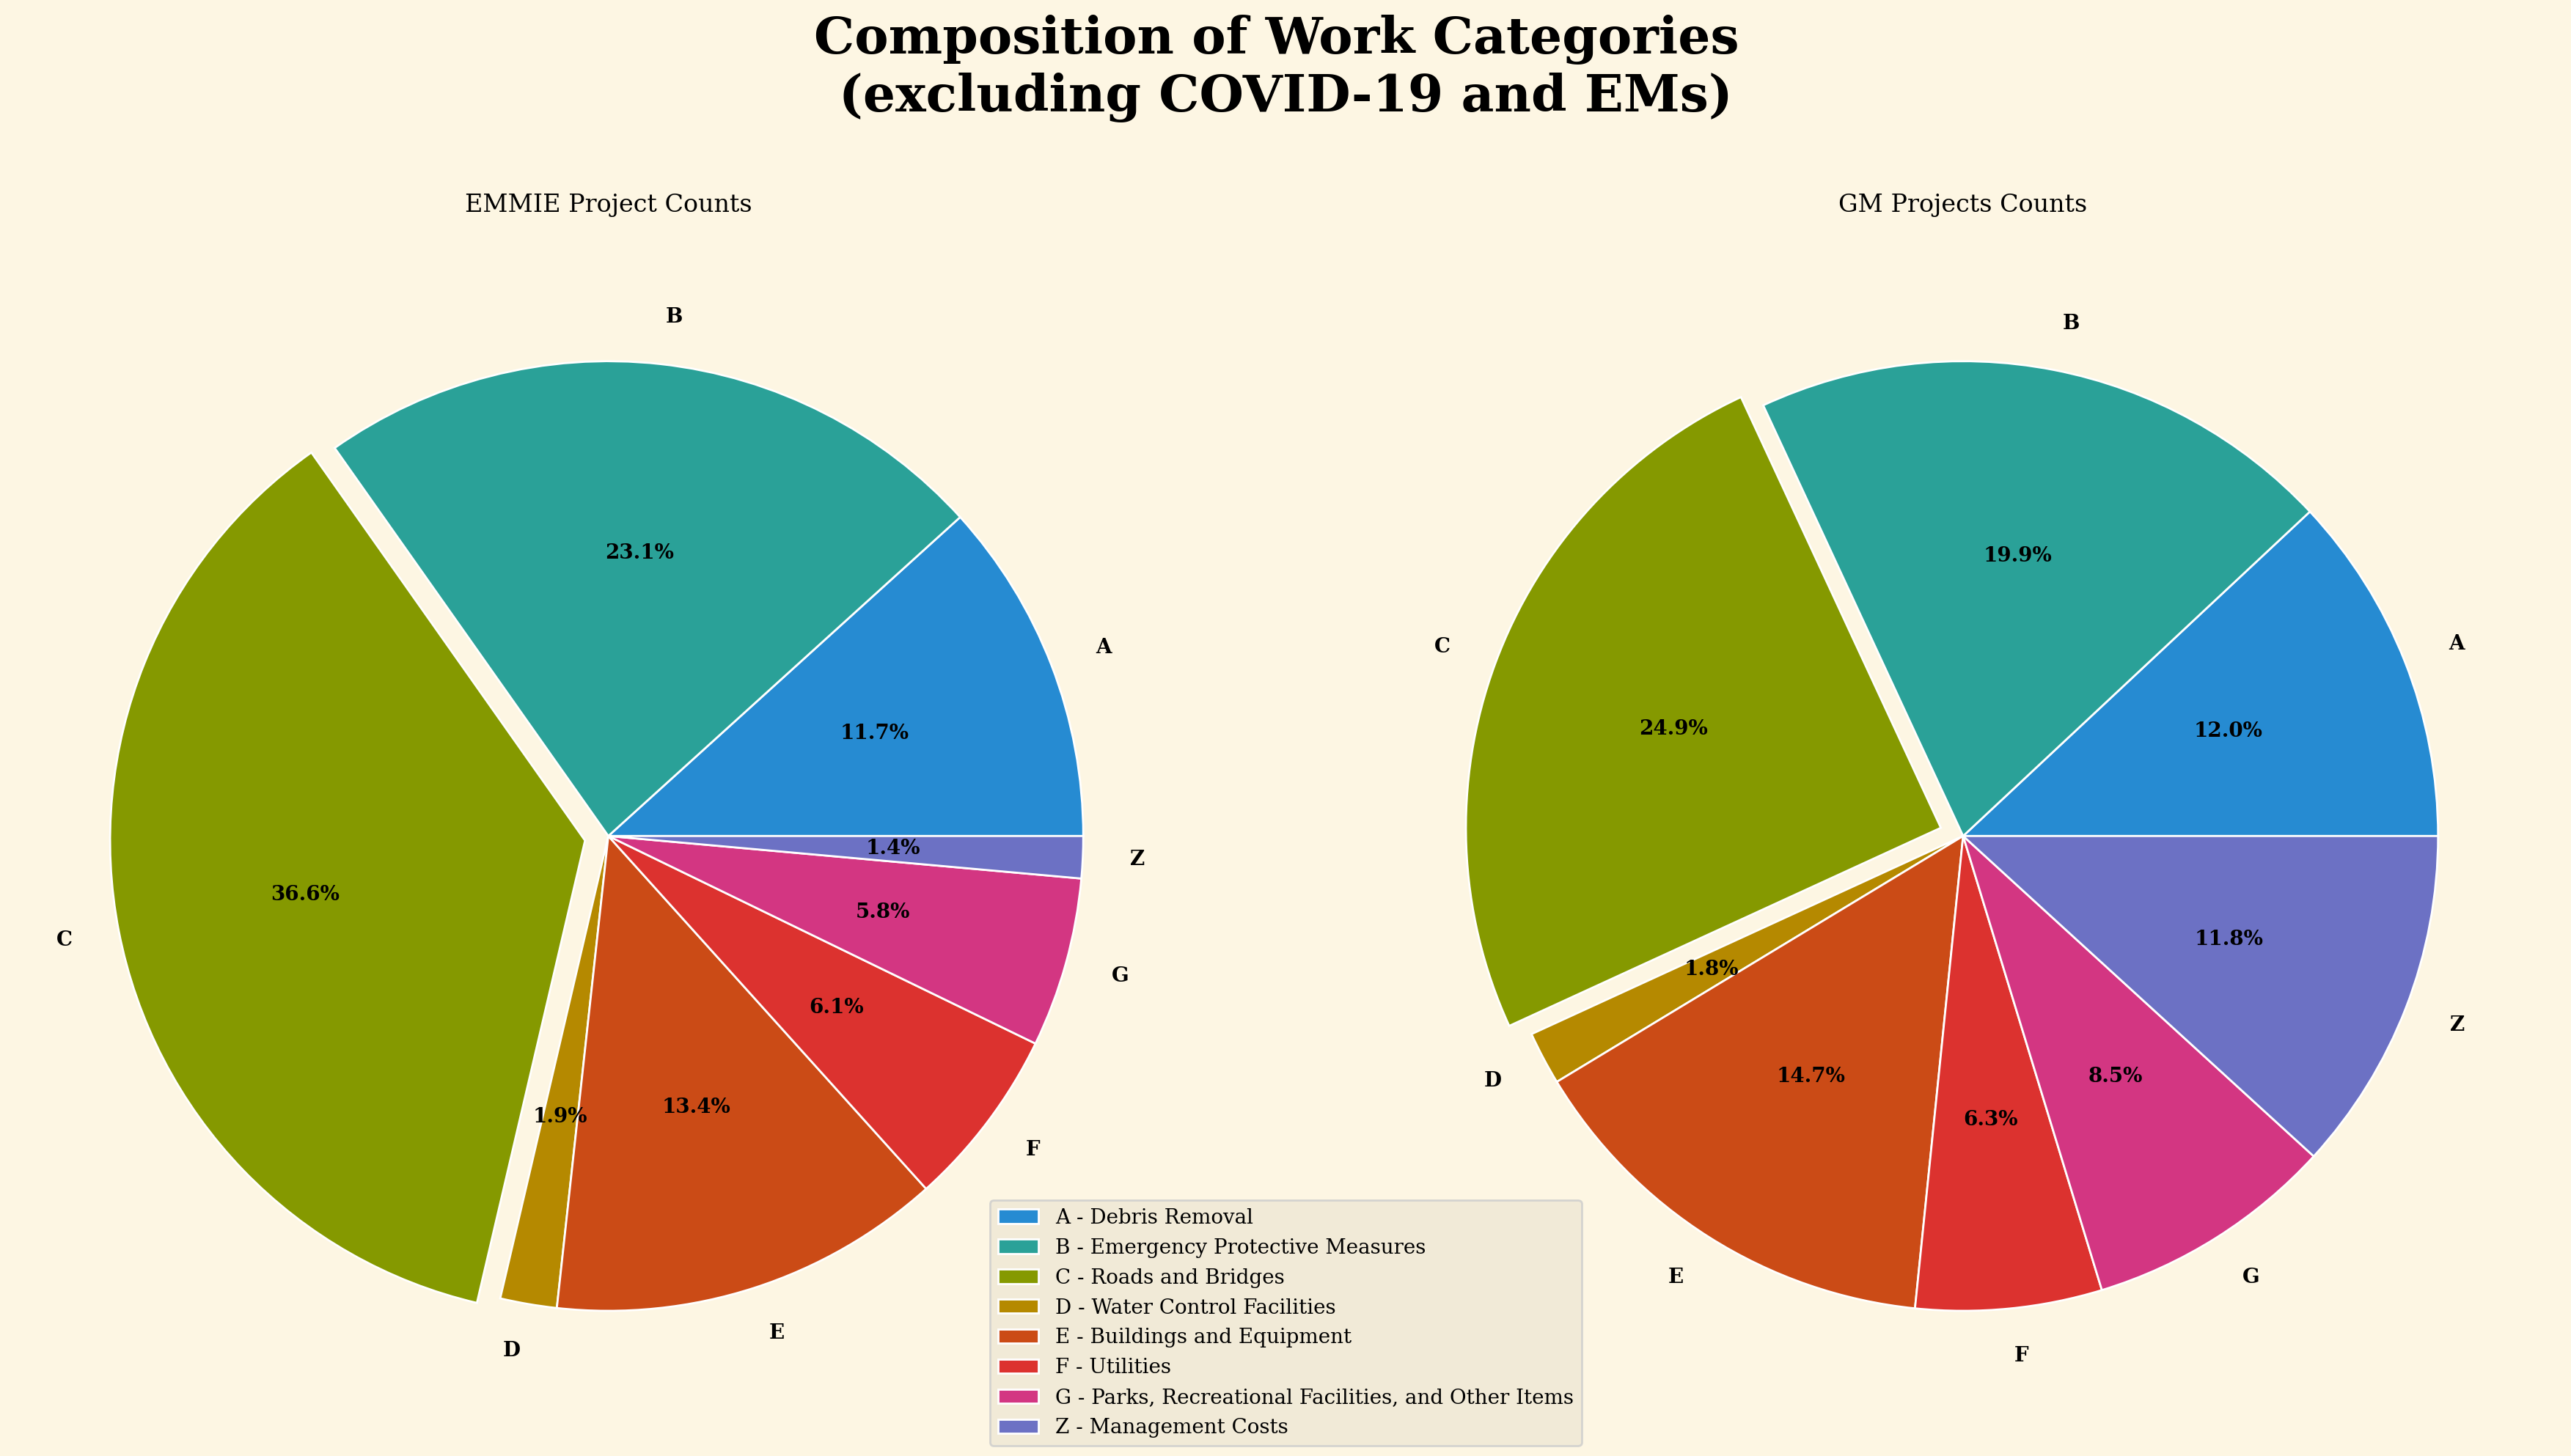

In [126]:
axes = totalCategories.plot.pie(subplots = True, autopct = '%1.1f%%',
                                title = 'Composition of Work Categories \n(excluding COVID-19 and EMs)\n',
                                wedgeprops = {'edgecolor':'w'}, textprops = {'color':'k', 'fontweight':'bold'},
                                legend = False,
                                explode = (0, 0, 0.05, 0, 0, 0, 0, 0))
for ax, title in zip(axes.ravel(), totalCategories.columns): #reformatting so titles are horizontal
    ax.set_title(title, color = 'k', size = 'large', fontweight = 'roman')
    ax.set_ylabel(None)
plt.figlegend(categories, loc = 'lower center')

Text(0.5, 0, 'Category of Work')

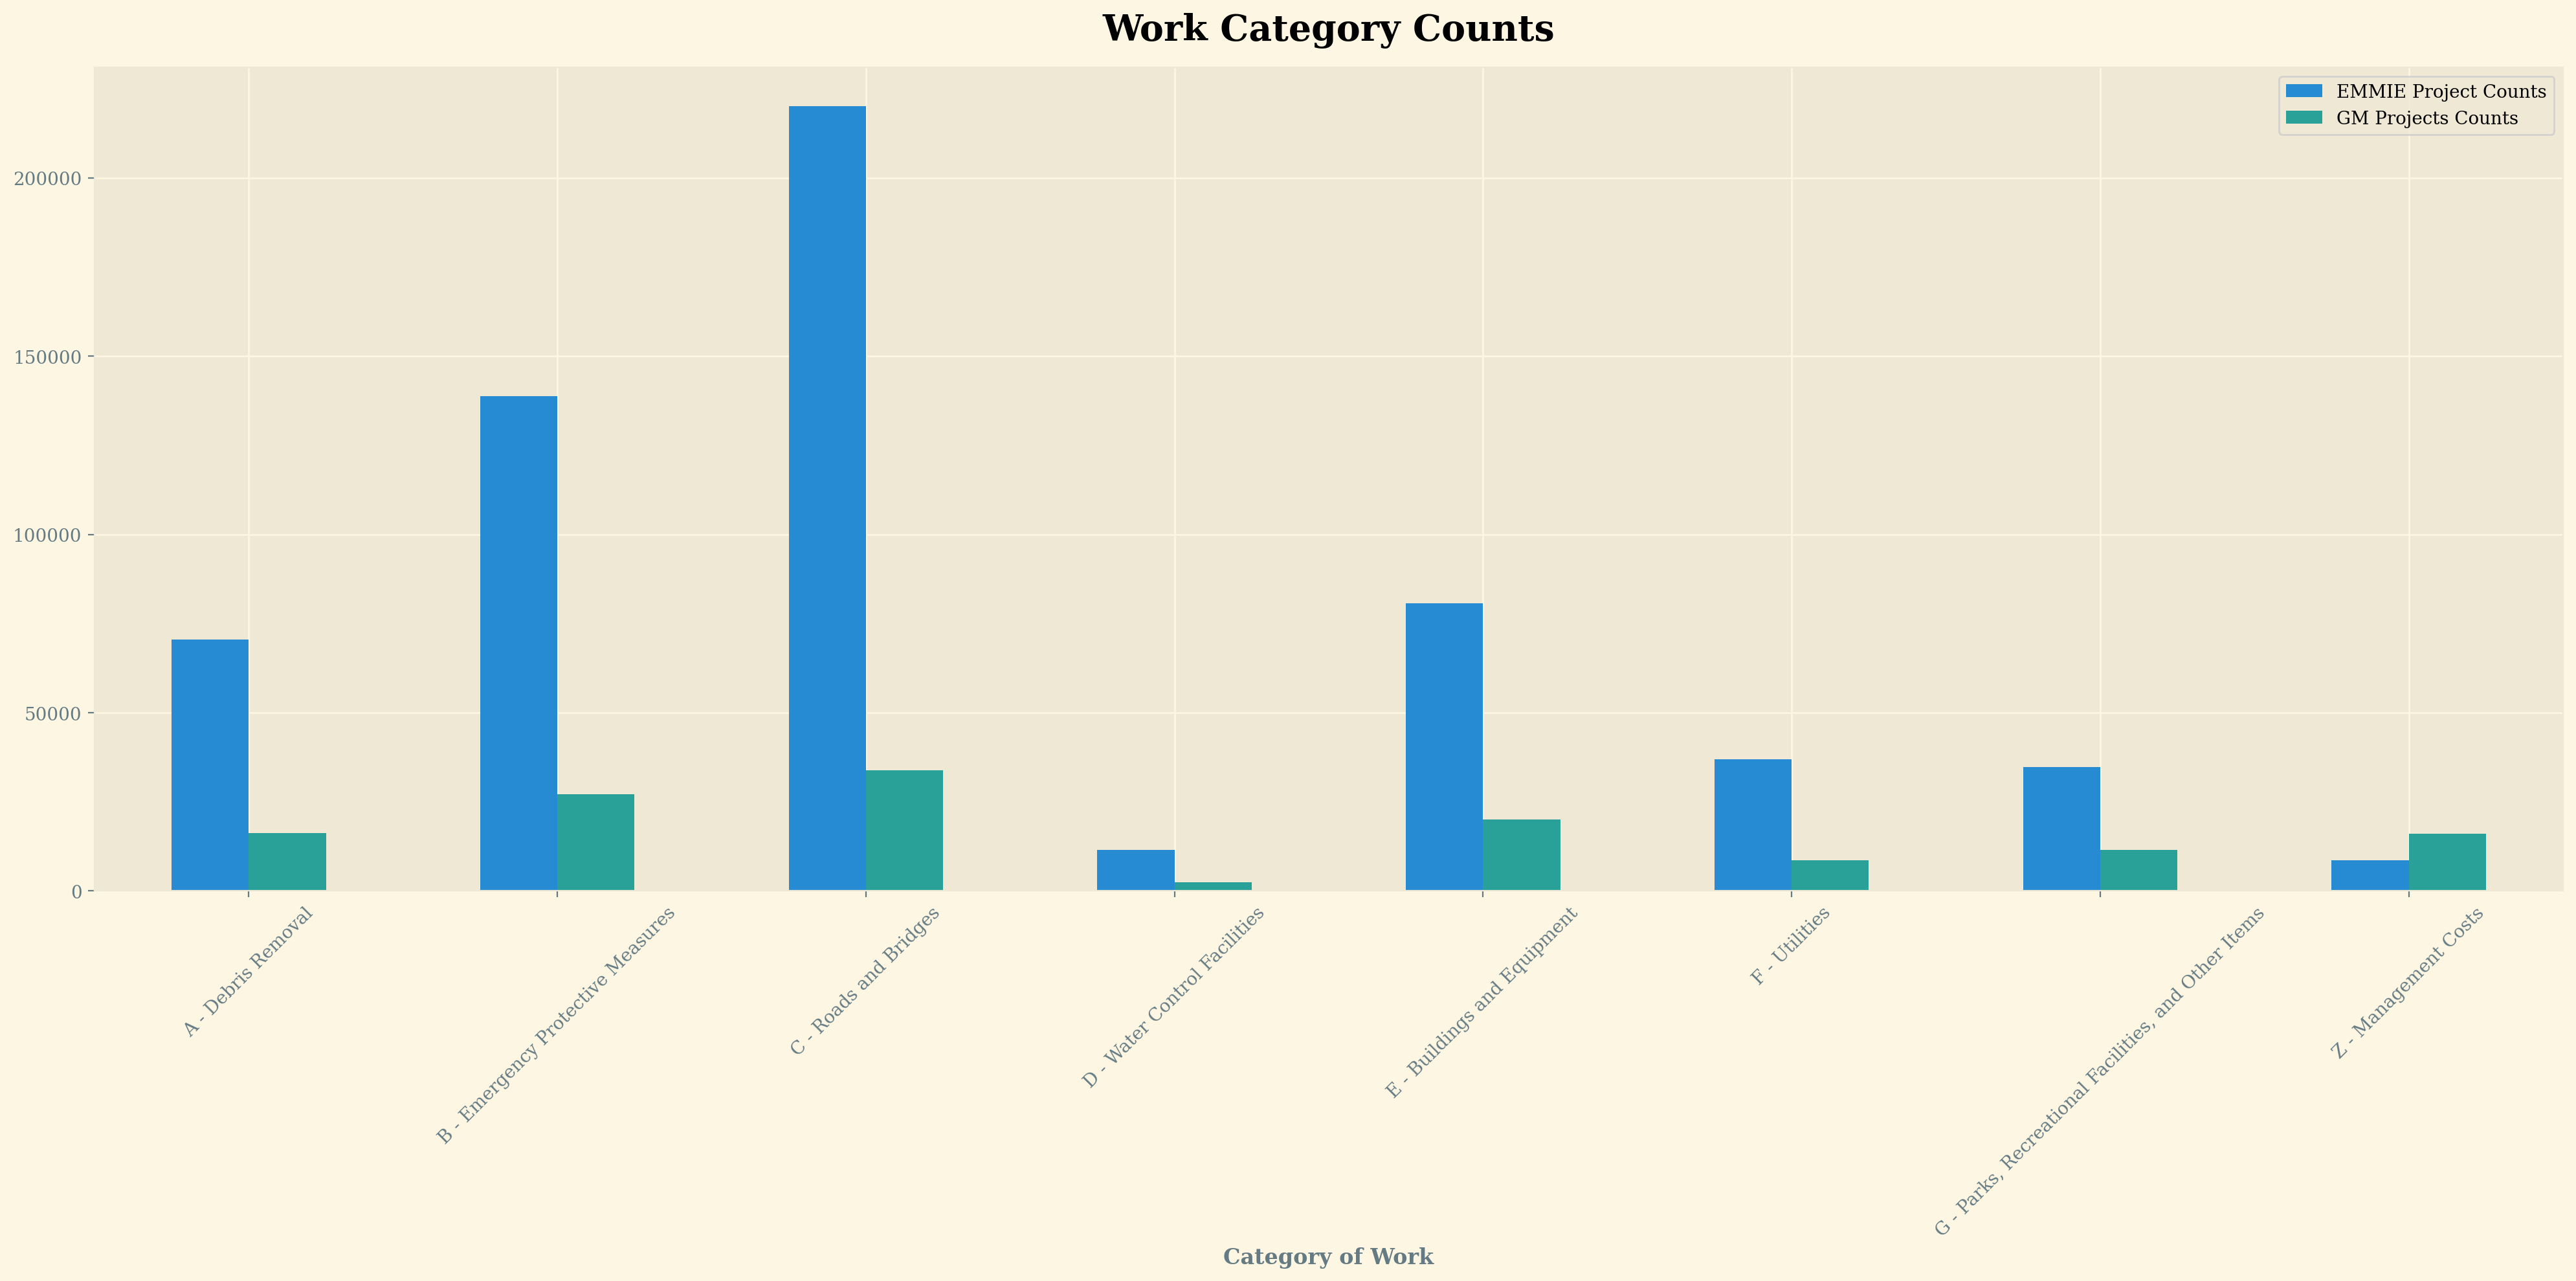

In [127]:
totalCategories.plot.bar(rot = 45, title = 'Work Category Counts')
plt.xticks(ticks = np.arange(0, 8), labels = categories)
plt.xlabel('Category of Work')

### Observations

In [159]:
# taking a look at funds obligated. These have been adjusted for inflation in the prior sections.

gmCatOblig = grantsM.groupby('damageCategoryCode').sum(numeric_only = True).loc[:,'totalObligAdjusted':]
emCatOblig = emmie.groupby('damageCategoryCode').sum(numeric_only = True).loc[:,'totalObligAdjusted':]

#values are in scientific notation. Would prefer to change format to show them as dollar values. 
pd.options.display.float_format = '${:,.2f}'.format

gmCatOblig.drop(index='I', inplace= True) # Removing Work Category I. It is negligible compared to other categories, and only present in Grants Manager era. 

projectDollars = emCatOblig.join(gmCatOblig, how = 'inner', lsuffix= '_em', rsuffix= '_gm')

In [162]:
projectDollars

,totalObligAdjusted_em,projectAmountAdjusted_em,federalShareAdjusted_em,totalObligAdjusted_gm,projectAmountAdjusted_gm,federalShareAdjusted_gm
damageCategoryCode,,,,,,
A,"$18,489,813,422.81","$20,627,821,850.45","$18,324,439,472.06","$14,656,227,855.23","$16,177,880,427.35","$14,656,227,855.23"
B,"$22,450,114,550.83","$25,126,135,382.49","$22,287,068,375.60","$22,848,996,069.77","$23,667,927,555.37","$22,848,996,069.77"
C,"$13,377,417,453.38","$15,989,612,367.20","$13,241,766,642.59","$13,414,803,979.52","$15,148,360,586.27","$13,414,803,979.52"
D,"$3,049,502,053.09","$3,794,648,923.56","$3,030,369,629.42","$1,068,033,789.25","$1,283,795,727.11","$1,068,033,789.25"
E,"$30,392,309,380.08","$32,750,453,369.29","$30,210,250,923.01","$25,452,901,349.27","$27,670,170,419.99","$25,452,901,349.27"
F,"$18,524,540,850.73","$21,561,702,000.46","$18,413,237,667.28","$36,138,533,688.46","$39,608,141,131.44","$36,138,533,688.46"
G,"$6,738,865,216.91","$7,733,006,955.44","$6,703,031,680.61","$4,283,081,246.04","$4,953,772,353.01","$4,283,081,246.04"
Z,"$7,727,395,316.85","$7,875,908,507.34","$7,727,241,772.61","$9,494,398,606.79","$9,546,938,348.79","$9,494,398,606.79"


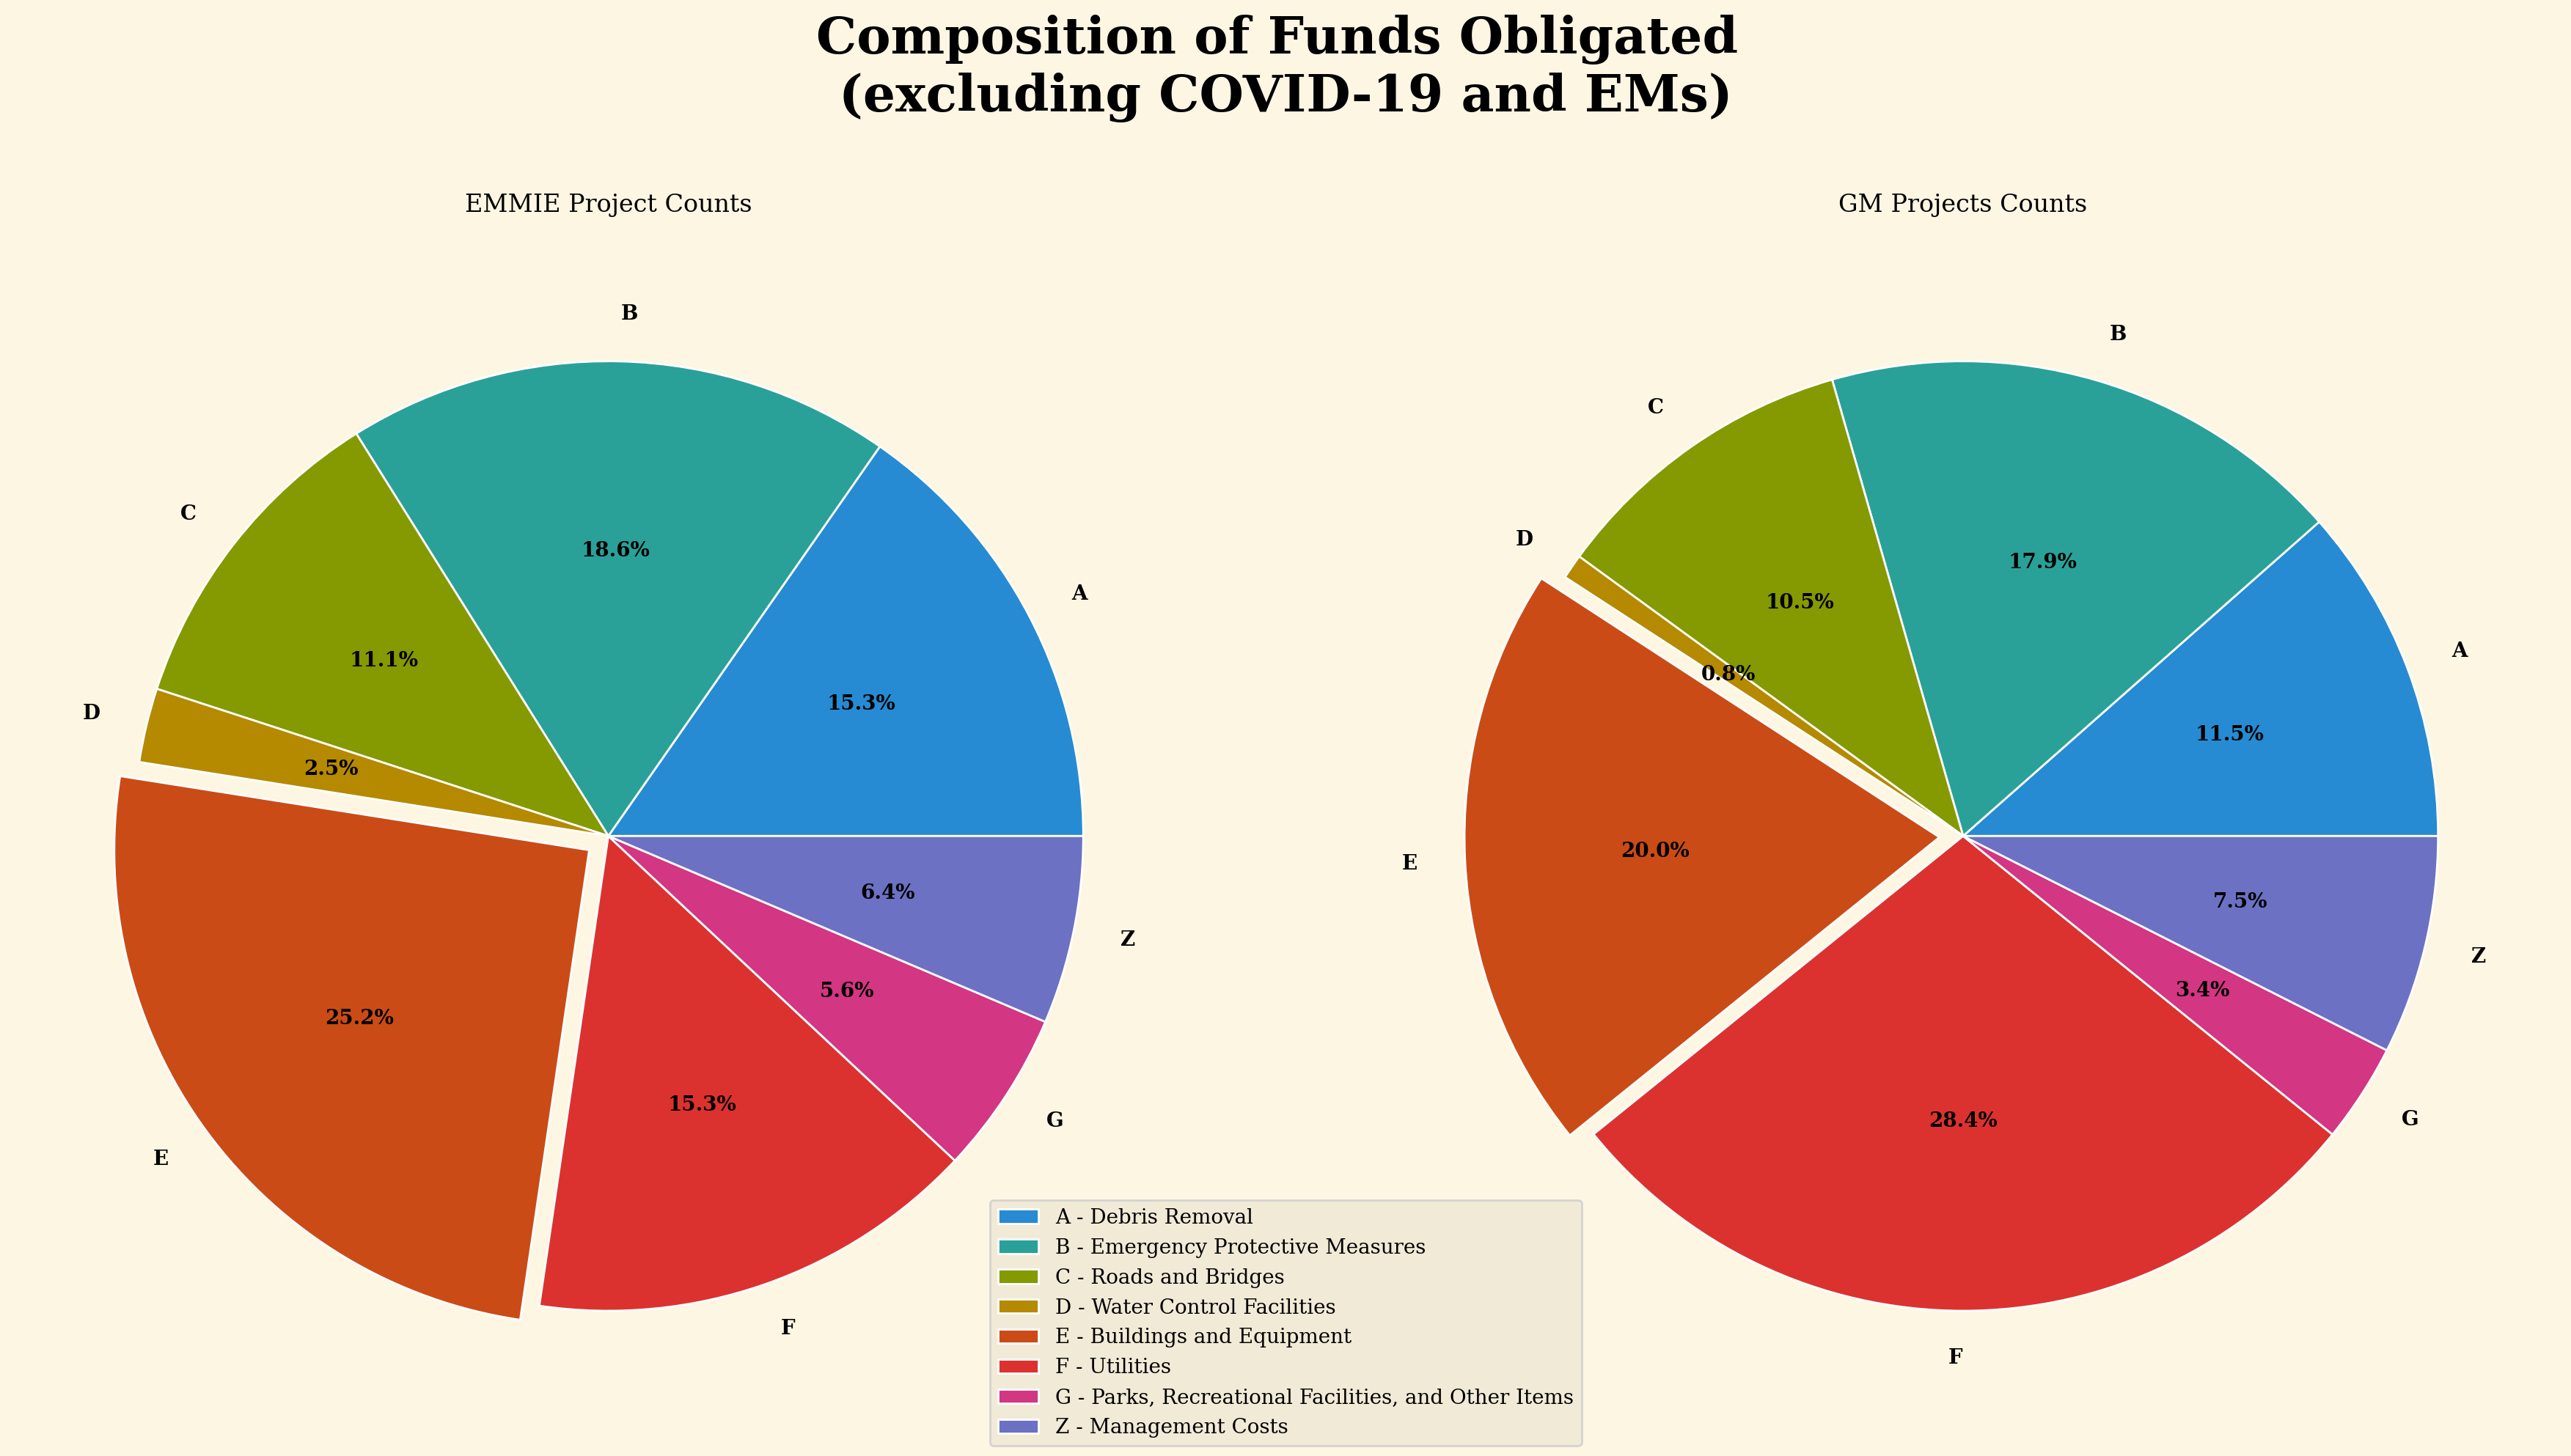

In [165]:
axes = projectDollars[['totalObligAdjusted_em', 'totalObligAdjusted_gm']].plot.pie(subplots = True, autopct = '%1.1f%%',
                                title = 'Composition of Funds Obligated \n(excluding COVID-19 and EMs)\n',
                                wedgeprops = {'edgecolor':'w'}, textprops = {'color':'k', 'fontweight':'bold'},
                                legend = False,
                                explode = (0, 0, 0, 0, 0.05, 0, 0, 0))
for ax, title in zip(axes.ravel(), totalCategories.columns): #reformatting so titles are horizontal
    ax.set_title(title, color = 'k', size = 'large', fontweight = 'roman')
    ax.set_ylabel(None)
plt.figlegend(categories, loc = 'lower center')

### Observations

## Grouping by Disaster Number


In [175]:
primary.groupby(['disasterNumber', 'damageCategoryCode']).sum(numeric_only = True)[['totalObligAdjusted']].unstack().fillna(0)

totalObligAdjusted                               \
damageCategoryCode                  A             B              C   
disasterNumber                                                       
1239                    $2,062,824.21 $6,292,543.08  $4,244,359.74   
1257                   $10,633,216.22 $8,685,032.84 $17,685,865.47   
1260                    $6,744,142.50   $776,461.00    $178,836.19   
1261                    $4,142,226.58   $393,170.74          $0.00   
1262                    $5,624,074.41 $2,940,118.11  $3,549,001.07   
...                               ...           ...            ...   
4886                            $0.00 $3,166,647.22    $141,799.53   
4888                      $118,542.61         $0.00    $123,389.68   
4889                       $10,950.00   $244,475.65     $28,406.28   
4890                       $13,393.39         $0.00          $0.00   
4893                            $0.00 $4,481,580.44          $0.00   

                                                                              \
damageCategoryCode             D              E              F             G   
disasterNumber                                                                 
1239                 $297,444.65    $642,499.98  $1,585,724.60 $1,072,527.07   
1257               $2,044,031.30 $14,500,337.09  $8,431,511.14 $3,224,841.15   
1260                       $0.00     $44,457.20 $10,996,128.14    $38,376.00   
1261                       $0.00     $28,614.37  $6,436,771.37    $69,288.20   
1262                       $0.00 $13,396,159.01  $3,601,807.13   $281,243.50   
...                          ...            ...            ...           ...   
4886                  $36,458.66          $0.00          $0.00    $98,897.74   
4888                       $0.00      $8,602.17     $24,987.48     $8,859.00   
4889                  $75,876.42     $17,307.21     $29,634.94    $65,364.30   
4890                       $0.00      $6,136.50          $0.00         $0.00   
4893                       $0.00          $0.00          $0.00         $0.00   

                                      
damageCategoryCode     I           Z  
disasterNumber                        
1239               $0.00  $86,689.47  
1257               $0.00 $671,920.70  
1260               $0.00 $258,335.46  
1261               $0.00       $0.00  
1262               $0.00 $281,283.24  
...                  ...         ...  
4886               $0.00 $206,000.00  
4888               $0.00       $0.00  
4889               $0.00       $0.00  
4890               $0.00       $0.00  
4893               $0.00  $99,594.50  

[1473 rows x 9 columns]